# Computational Finance Course Work

# Course work pricing derivation


Import necessary libraries for Option pricing analysis

Yfinance package --> download the financial time series data for "Bitcoin token BTC_GBP".

Numpy --> mathematical operations which are needed in designing a price derivative of a stock.

Pandas --> data frames and data analysis.

Matplotlib --> Ploting the graphs.

OS module --> Helps with OS operations such as creating and removing a directory, fetching its contents, print with string

In [21]:
#Import required libaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si

# Downloading data via Yahoo Finance
Data of one years for the cryptocurrency Bitcoin is downloaded using the yfinance from 10thJune'22 - 10thJune'23 "BTC-GBP" and saved in the variable BTC_GBP

In [38]:
BTC = yf.download('BTC-GBP', start='2022-01-01', end='2022-12-31'

[*********************100%***********************]  1 of 1 completed


In [39]:
BTC.head() # Top 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,34225.121094,35345.148438,34207.933594,35241.316406,35241.316406,18166984239
2022-01-02,35236.968750,35385.125000,34628.027344,35014.582031,35014.582031,20671834823
2022-01-03,35013.343750,35182.785156,34011.476562,34458.078125,34458.078125,24529292899
2022-01-04,34458.621094,35015.472656,33836.234375,33923.312500,33923.312500,31408198892
2022-01-05,33924.628906,34685.585938,31572.978516,32143.250000,32143.250000,27187072110


In [40]:
BTC.tail()  # last 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,14002.829102,14034.833008,13835.137695,13900.296875,13900.296875,13094912972
2022-12-28,13899.653320,13848.329102,13725.719727,13761.642578,13761.642578,14138380496
2022-12-29,13761.435547,13837.160156,13709.833984,13805.222656,13805.222656,12005068322
2022-12-30,13804.382812,13806.338867,13582.739258,13717.736328,13717.736328,13161327492
2022-12-31,13718.636719,13745.238281,13653.100586,13677.877930,13677.877930,9290120459


In [41]:
adj_close =  BTC['Adj Close'] #Take only Adj Close 
close = BTC['Close']

array([<AxesSubplot:xlabel='Date'>], dtype=object)

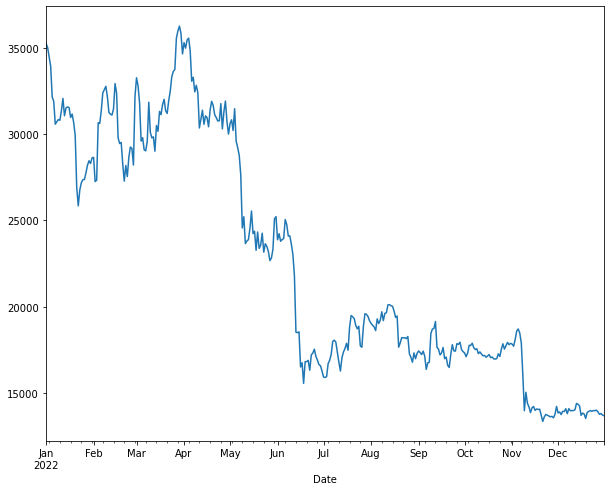

In [42]:
adj_close.plot(figsize=(10, 8), subplots=True)

In [43]:
BTC_data = pd.DataFrame(adj_close.dropna()) #Put adj close in the data frame after removing null data
BTC_data.tail() # Read last 5 rows of adj_close data

,Adj Close
Date,
2022-12-27,13900.296875
2022-12-28,13761.642578
2022-12-29,13805.222656
2022-12-30,13717.736328
2022-12-31,13677.877930


In [44]:
BTC_data[BTC_data['Adj Close'] == BTC_data['Adj Close'].max()]

,Adj Close
Date,
2022-03-29,36252.851562


In [46]:
BTC_data.describe().round(2) # Descriptive Statistics for Adjacent close price 

,Adj Close
count,365.00
mean,22449.66
std,6906.79
min,13349.08
25%,17119.46
50%,19178.63
75%,29837.78
max,36252.85


In [47]:
BTC_data['SMA1'] = BTC_data['Adj Close'].rolling(window=20).mean()
BTC_data['SMA2'] = BTC_data['Adj Close'].rolling(window=60).mean()
BTC_data[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-12-27,13900.296875,13971.172852,14669.264437
2022-12-28,13761.642578,13954.896191,14599.856755
2022-12-29,13805.222656,13946.685840,14533.327295
2022-12-30,13717.736328,13933.868896,14464.076449
2022-12-31,13677.877930,13918.813623,14394.879329


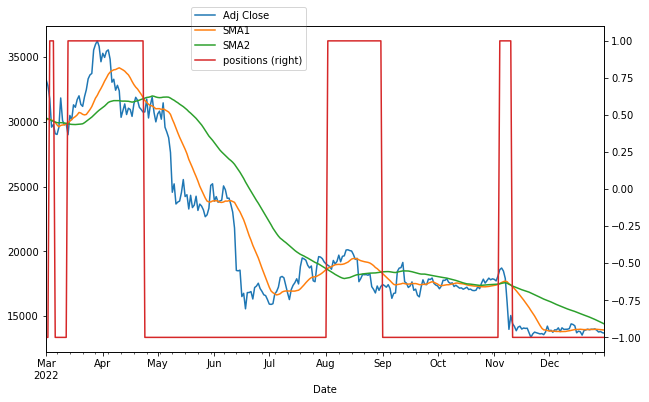

In [48]:
BTC_data.dropna(inplace=True)
BTC_data['positions'] = np.where(BTC_data['SMA1'] > BTC_data['SMA2'],1,-1)
ax = BTC_data[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))


In [49]:
BTC_adj_close = pd.DataFrame(adj_close.dropna())

In [50]:
normal_return = BTC_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2022-01-01,NaN
2022-01-02,-0.006434
2022-01-03,-0.015893
2022-01-04,-0.015519
2022-01-05,-0.052473


In [51]:
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is -0.76405283 and its annualized volatility is 0.60319953


In [52]:
log_rets = np.log(BTC_adj_close / BTC_adj_close.shift(1))
log_rets.head().round(4)

,Adj Close
Date,
2022-01-01,NaN
2022-01-02,-0.0065
2022-01-03,-0.0160
2022-01-04,-0.0156
2022-01-05,-0.0539


In [53]:
dflr = pd.DataFrame(log_rets, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is -0.94903949 and its annualized volatility is 0.60972990 


In [54]:
log_return_last_3months=log_rets[-90:]
log_return_last_3months

,Adj Close
Date,
2022-10-03,0.011927
2022-10-04,0.025813
2022-10-05,-0.000429
2022-10-06,0.007118
2022-10-07,-0.014655
...,...
2022-12-27,-0.007380
2022-12-28,-0.010025
2022-12-29,0.003162


In [55]:
dflr1 = pd.DataFrame(log_return_last_3months, columns = ['Adj Close']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The annualized log return (for the last 3 months) is %.8f and its annualized volatility is %.8f' % (lr1,lv1))

The annualized log return (for the last 3 months) is -0.90607175 and its annualized volatility is 0.47147787


In [56]:
log_return_mid_year=log_rets[150:-90]
log_return_mid_year

,Adj Close
Date,
2022-05-31,0.004941
2022-06-01,-0.054579
2022-06-02,0.014494
2022-06-03,-0.018196
2022-06-04,0.004317
...,...
2022-09-28,0.006687
2022-09-29,-0.023473
2022-09-30,-0.007277


In [57]:
dflr2 = pd.DataFrame(log_return_mid_year, columns = ['Adj Close']) 
lr2 = dflr2.mean() * len(dflr)
lv2 = dflr2.std() * (len(dflr) ** 0.5)
print('The mid year annualized  log return is %.8f and its annualized volatility is %.8f' % (lr2,lv2))

The mid year annualized  log return is -1.11899484 and its annualized volatility is 0.64900337


In [58]:
all_lv=lv,lv2,lv1
all_lv1 = pd.DataFrame (all_lv)

In [59]:
lv_avg=all_lv1 ['Adj Close'].mean()
print ('The combine Annualized Log volatility =', lv_avg)

The combine Annualized Log volatility = 0.576737046762975


In [60]:
all_lr = lr,lr2,lr1
all_lr1 = pd.DataFrame (all_lr)

In [61]:
lr_avg=all_lr1 ['Adj Close'].mean()
print ('The combine Annualized Log Return =', lr_avg)

The combine Annualized Log Return = -0.9913686938484112


Text(0.5, 1.0, 'Log Return')

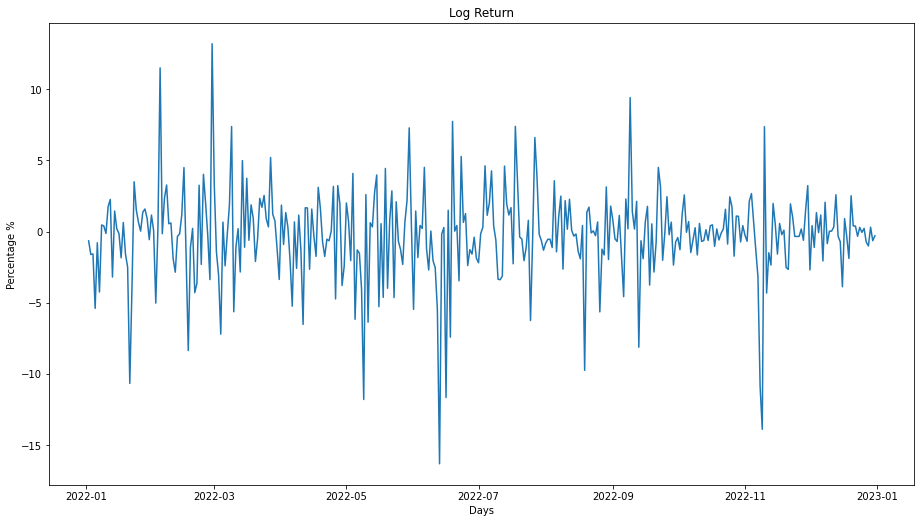

In [62]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')

Text(0.5, 1.0, 'BTC_data Average annualized volatility:57.67%')

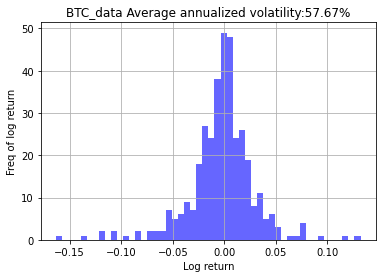

In [63]:
str_vol = str(round(lv_avg, 4)*100)
fig, ax = plt.subplots()
dflr['Adj Close'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('BTC_data Average annualized volatility:'+ str_vol + '%')

In [72]:
S0 = 13677.87         # spot stock price  
K = 13577.0              # As it's put option, I'm choosing strike price ( $85.0) below the current spot price
T = 1/52              # Time to maturity  is set as 1 week
r = 0.0163            # Risk free rate   
sig = 0.5767          # Average annualized log volatility (last one year, mid-period of the tenure and last 3 months)
N = 6                 # Number of time steps  
payoff = "call"       # the option type

In [73]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))

Crypto Price movement UP factor 1.0331880418537411 and DOWN factor 0.9678780236420513 


In [74]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [75]:
S

array([[13677.87      , 14131.81172203, 14600.81888093, 15085.39146905,
        15586.0460725 , 16103.31642189, 16637.75396129],
       [    0.        , 13238.50978323, 13677.87      , 14131.81172203,
        14600.81888093, 15085.39146905, 15586.0460725 ],
       [    0.        ,     0.        , 12813.26268496, 13238.50978323,
        13677.87      , 14131.81172203, 14600.81888093],
       [    0.        ,     0.        ,     0.        , 12401.67536393,
        12813.26268496, 13238.50978323, 13677.87      ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        12003.30904109, 12401.67536393, 12813.26268496],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        , 11617.73903185, 12003.30904109],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        , 11244.55429334]])

In [76]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [77]:
print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)

Probalilty for moving  up :  0.4926383760623969
Probalilty for moving  down :  0.5073616239376031


In [78]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)

In [79]:
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , 3060.75396129],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , 2009.0460725 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , 1023.81888093],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  100.87      ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [80]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 485.40366141,  735.87361887, 1077.25270649, 1510.51923596,
        2010.46462083, 2527.02571458, 3060.75396129],
       [   0.        ,  242.25213519,  404.47686805,  656.6701705 ,
        1025.23742925, 1509.10076174, 2009.0460725 ],
       [   0.        ,    0.        ,   84.75998613,  159.64367367,
         298.86607268,  555.52101472, 1023.81888093],
       [   0.        ,    0.        ,    0.        ,   12.05809423,
          24.47784174,   49.68983695,  100.87      ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [81]:
print('European ' + payoff, str( V[0,0]))

European call 485.4036614060786


In [82]:
def mcs_simulation_np(p,s):
    M = p  # M is number of time steps
    I = s  # I is number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [84]:
T = 1/52
r = 0.0163
sigma = 0.5767
S0 = 13677.87
K = 13577.0

In [85]:
S = mcs_simulation_np(100,10000)

In [86]:
S = np.transpose(S)
S

array([[13677.87      , 13643.59542665, 13796.06470776, ...,
        13137.12472995, 12910.35252905, 12953.28225838],
       [13677.87      , 13655.07907373, 13559.4811446 , ...,
        14484.56509392, 14679.06088966, 14757.5922102 ],
       [13677.87      , 13696.76513626, 13713.3722287 , ...,
        14444.0140835 , 14417.00945003, 14145.76547203],
       ...,
       [13677.87      , 13655.47366286, 13718.25662065, ...,
        13399.56987347, 13358.42945525, 13442.41729831],
       [13677.87      , 13683.03800781, 13648.82786396, ...,
        14044.91288278, 14096.67573423, 14086.83634104],
       [13677.87      , 13453.28299564, 13586.74747339, ...,
        11625.05325625, 11451.48688231, 11513.77965833]])

Text(0, 0.5, 'Frequency')

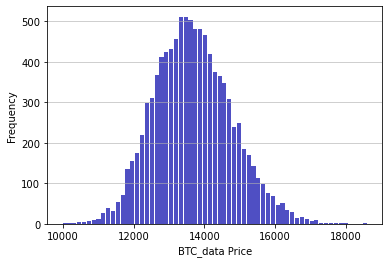

In [87]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(x=S[:,1], bins=[30,40,50,60,70,80,90,100,110,120],range =(S.min(),S.max()), color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('BTC_data Price')
plt.ylabel('Frequency')

In [88]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put from Monte Carlo Simulation', str(p))

European put from Monte Carlo Simulation 384.6229445623875


In [93]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [94]:
bsp = euro_option_bs(13677.87,13577.0,1/52,0.0163,0.5767, "call")
print('European put option price using BSM is $', bsp)

European put option price using BSM is $ 489.18164790268474


In [95]:
S = np.linspace(10,180,25)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 13577.0,1/52,0.0163,0.5767, "call")

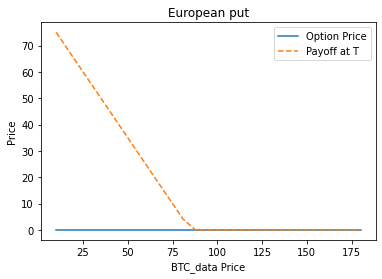

In [97]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(85- S,0), '--')
plt.xlabel('BTC_data Price')
plt.ylabel('Price')
plt.title('European put')
plt.legend(['Option Price','Payoff at T'])

In [99]:
print(' Binomial price tree method - Eurpoean put price for BTC_data wiht 1 week expiry  ' , str( V[0,0].round(4)))
print(' Monte Carlo Simulation method -Eurpoean put price for BTC_data with 1 week expiry  ', str(p.round(4)))
print(' BSM method - Eurpoean put price for BTC_data with 1 week expiry  ', bsp.round(4))

 Binomial price tree method - Eurpoean put price for BTC_data wiht 1 week expiry   485.4037
 Monte Carlo Simulation method -Eurpoean put price for BTC_data with 1 week expiry   384.6229
 BSM method - Eurpoean put price for BTC_data with 1 week expiry   489.1816


In [100]:
Put_prices=( float( V[0,0].round(4)),(p.round(4)),bsp)
Put_price1 = pd.DataFrame (Put_prices)

In [101]:
Put_price1['Method'] = ('Binomial price tree ', 'Monte Carlo Simulation method', 'Black Scholes Model')
Put_price1.columns = ['Price','Method' ]
Put_price1

,Price,Method
0,485.403700,Binomial price tree
1,384.622900,Monte Carlo Simulation method
2,489.181648,Black Scholes Model


In [104]:
Price_mean= Put_price1['Price'].mean()
print ('The combine price for BTC_data is $', Price_mean)

The combine price for BTC_data is $ 453.0694159675616


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [106]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [112]:
d = delta(13677.87,13577.0,1/52,0.0163, 0, 0.5767, "put")
print('The value of Delta is', d.round(4),'.','If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $', abs(d).round(4));

The value of Delta is -0.4457 . If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $ 0.4457


In [113]:
S = np.linspace(20,200,15)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 13577.0,1/52, 0.0163, 0, 0.5767, "put")

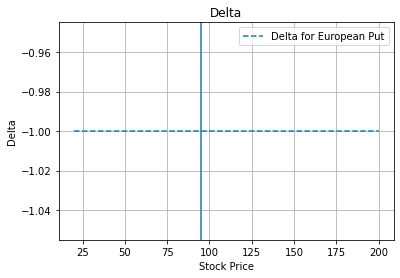

In [114]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.axvline(95.10)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for European Put'])

In [116]:
S = np.linspace(60, 150, 15)
T = np.linspace(0.001, 0.03, 15)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 13577.0,T[i], 0.0163, 0, 0.5676, "put")

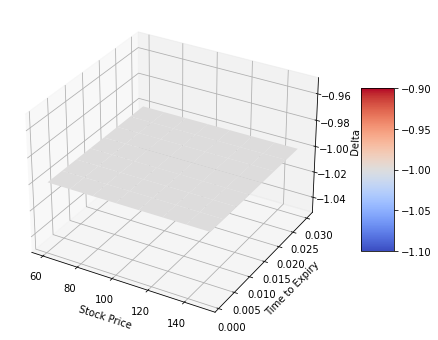

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);